In [2]:
import pickle
from constants import *
from plot_config import *
from sample_analysis import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Distribution of Peak Heights

In [4]:
peak_heights_file = 'data/heights/heights_60-99_6seg_sigma3.5_threshold1.pkl'
with open(peak_heights_file, 'rb') as f:
    peak_heights = pickle.load(f)
print(peak_heights.keys())

dict_keys(['all_peak_h', 'mean_all_h', 'std_all_h', 'n_peaks'])


In [3]:
heights = peak_heights['all_peak_h']
n_peaks = peak_heights['n_peaks']
fit = powerlaw.Fit(heights, xmin=min(heights), xmax=max(heights), discrete=True)
print(f"Exponent: {fit.alpha}")
print(f"Error: {fit.sigma}")

Exponent: 1.2793590229577536
Error: 9.486079128543707e-05


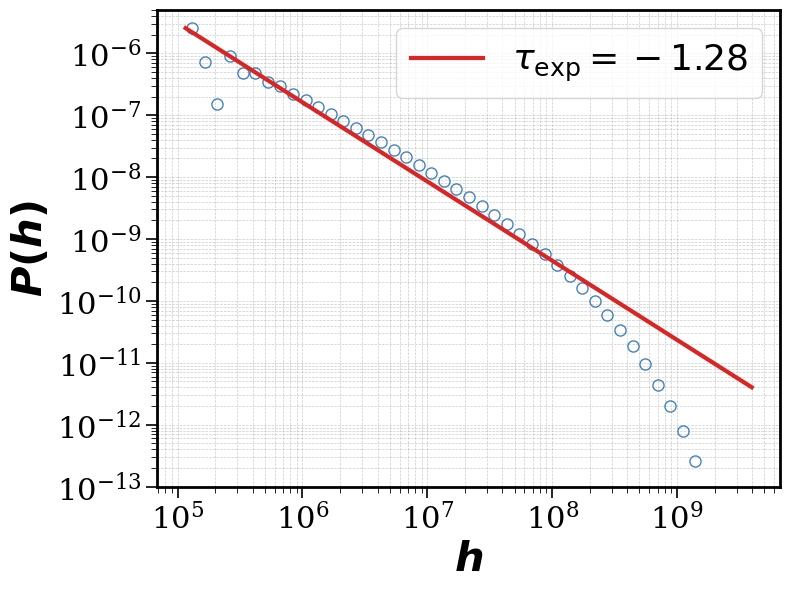

In [4]:
c_red = plt.get_cmap('Reds')
c_blue = plt.get_cmap('Blues')
c = [c_blue(0.8), c_red(0.7)]
fig, ax = plt.subplots(figsize=(8, 6))
fit.plot_pdf(color=c[0], marker='o', linestyle='None', fillstyle='none', ax=ax, markersize=8, alpha=0.8)
fit.power_law.plot_pdf(color=c[1], linestyle='-', ax=ax , label=rf'$\tau_{{\rm exp}}=-{fit.alpha:.2f}$', linewidth=3)
ax.set_xlabel(r'$\boldsymbol{h}$')
ax.set_ylabel(r'$\boldsymbol{P(h)}$')
ax.legend()
plt.grid(True, alpha=0.4, linestyle='--', which='both')
plt.ylim(1e-13, 5e-6)
plt.tight_layout()

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'heights_pdf.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'heights_pdf.pkl'), 'wb') as f:
        pickle.dump(fig, f)

plt.show()

# Mean Activity for Random Peak Heights

In [8]:
random_peaks_dir = 'data/random_peaks/1/'
random_peaks_files = os.listdir(random_peaks_dir)
random_peaks_files

['sample_60_6seg_sigma3.5_threshold1.pkl',
 'sample_61_6seg_sigma3.5_threshold1.pkl',
 'sample_62_6seg_sigma3.5_threshold1.pkl',
 'sample_63_6seg_sigma3.5_threshold1.pkl',
 'sample_64_6seg_sigma3.5_threshold1.pkl',
 'sample_65_6seg_sigma3.5_threshold1.pkl',
 'sample_66_6seg_sigma3.5_threshold1.pkl',
 'sample_67_6seg_sigma3.5_threshold1.pkl',
 'sample_68_6seg_sigma3.5_threshold1.pkl',
 'sample_69_6seg_sigma3.5_threshold1.pkl',
 'sample_70_6seg_sigma3.5_threshold1.pkl',
 'sample_71_6seg_sigma3.5_threshold1.pkl',
 'sample_72_6seg_sigma3.5_threshold1.pkl',
 'sample_73_6seg_sigma3.5_threshold1.pkl',
 'sample_74_6seg_sigma3.5_threshold1.pkl',
 'sample_75_6seg_sigma3.5_threshold1.pkl',
 'sample_76_6seg_sigma3.5_threshold1.pkl',
 'sample_77_6seg_sigma3.5_threshold1.pkl',
 'sample_78_6seg_sigma3.5_threshold1.pkl',
 'sample_79_6seg_sigma3.5_threshold1.pkl',
 'sample_80_6seg_sigma3.5_threshold1.pkl',
 'sample_81_6seg_sigma3.5_threshold1.pkl',
 'sample_82_6seg_sigma3.5_threshold1.pkl',
 'sample_83

In [9]:
random_peaks_data = []
N_SAMPLES = len(random_peaks_files)
for file in random_peaks_files:
    with open(random_peaks_dir + file, 'rb') as f:
        random_peaks_data.append(pickle.load(f))
print(random_peaks_data[0].keys())

dict_keys(['random_time_windows', 'random_n_before', 'random_n_after', 'random_mean_n_before', 'random_mean_n_after', 'random_mean_a_before', 'random_mean_a_after', 'n_random_peaks'])


In [19]:
random_time_windows = random_peaks_data[0]['random_time_windows']

all_random_n_before = np.concatenate([random_peaks_data[i]['random_n_before'] for i in range(N_SAMPLES)], axis=0)
mean_random_n_before = np.mean(all_random_n_before, axis=0)
std_random_n_before = np.std(all_random_n_before, axis=0, ddof=1)

all_random_n_after = np.concatenate([random_peaks_data[i]['random_n_after'] for i in range(N_SAMPLES)], axis=0)
mean_random_n_after = np.mean(all_random_n_after, axis=0)
std_random_n_after = np.std(all_random_n_after, axis=0, ddof=1)

all_random_n_peaks = np.sum([random_peaks_data[i]['n_random_peaks'] for i in range(N_SAMPLES)], axis=0)

random_activity_before = np.diff(all_random_n_before, prepend=0) / random_time_windows
mean_random_activity_before = np.mean(random_activity_before, axis=0)
std_random_activity_before = np.std(random_activity_before, axis=0, ddof=1)

random_activity_after = np.diff(all_random_n_after, prepend=0) / random_time_windows
mean_random_activity_after = np.mean(random_activity_after, axis=0)
std_random_activity_after = np.std(random_activity_after, axis=0, ddof=1)

print(f"Total number of random peaks: {all_random_n_peaks}")

Total number of random peaks: 51188


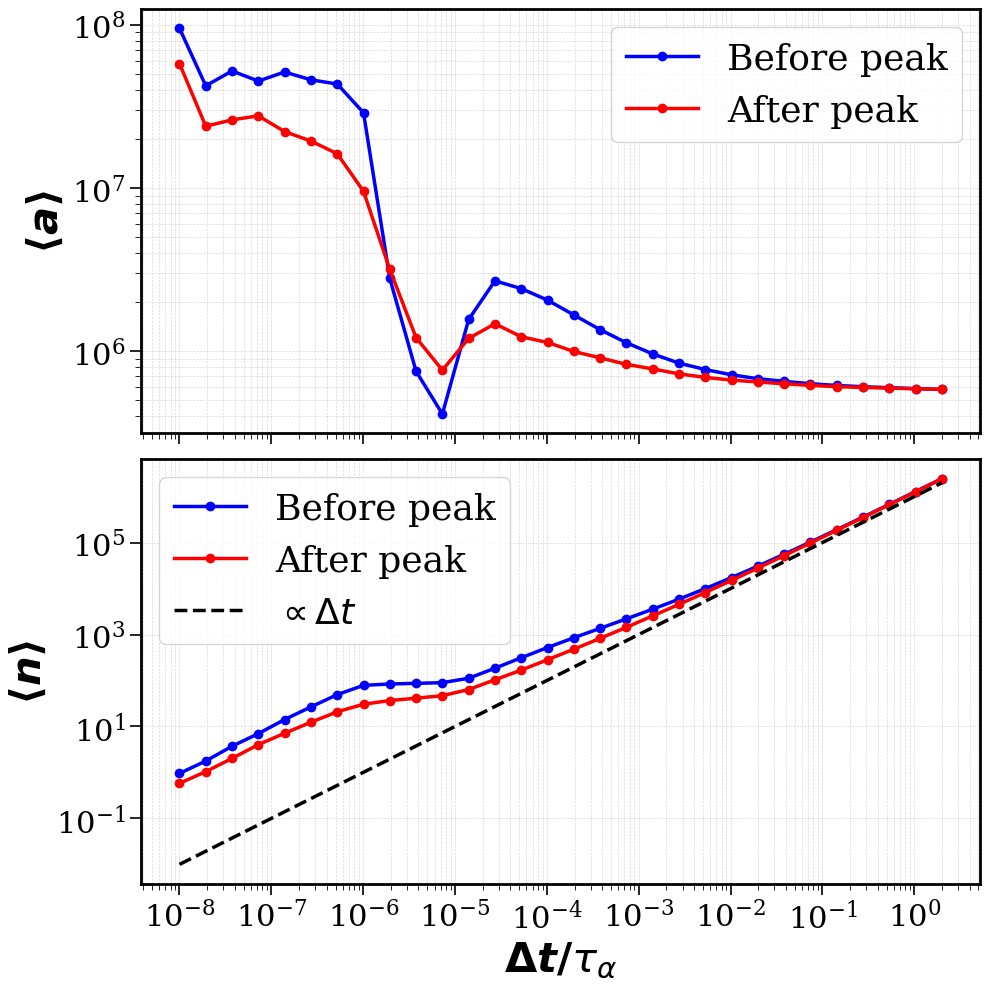

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 10))

axs[0].plot(random_time_windows, mean_random_activity_before, marker='o', linestyle='-', color='b', label='Before peak')
axs[0].plot(random_time_windows, mean_random_activity_after, marker='o', linestyle='-', color='r', label='After peak')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$\boldsymbol{\langle a \rangle}$')
axs[0].legend(loc='best')
axs[0].grid(True, alpha=0.3, which='both', ls='--')

axs[1].plot(random_time_windows, mean_random_n_before, marker='o', linestyle='-', color='b', label='Before peak')
axs[1].plot(random_time_windows, mean_random_n_after, marker='o', linestyle='-', color='r', label='After peak')
axs[1].plot(random_time_windows, 1e6 * random_time_windows, linestyle='--', color='black', label=r'$\propto \Delta t$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[1].set_ylabel(r'$\boldsymbol{\langle n \rangle}$')
axs[1].legend(loc='best')
axs[1].grid(True, alpha=0.3, which='both', ls='--')

plt.tight_layout()
plt.show()

# Mean Activity for Given Peak Heights

In [21]:
sample_data_dir = 'data/sample_data/1/'
sample_data_files = os.listdir(sample_data_dir)[1:]  # the first file is the heights_info file
sample_data_files

['sample_61_6seg_sigma3.5_threshold1.pkl',
 'sample_62_6seg_sigma3.5_threshold1.pkl',
 'sample_63_6seg_sigma3.5_threshold1.pkl',
 'sample_64_6seg_sigma3.5_threshold1.pkl',
 'sample_65_6seg_sigma3.5_threshold1.pkl',
 'sample_66_6seg_sigma3.5_threshold1.pkl',
 'sample_67_6seg_sigma3.5_threshold1.pkl',
 'sample_68_6seg_sigma3.5_threshold1.pkl',
 'sample_69_6seg_sigma3.5_threshold1.pkl',
 'sample_70_6seg_sigma3.5_threshold1.pkl',
 'sample_71_6seg_sigma3.5_threshold1.pkl',
 'sample_72_6seg_sigma3.5_threshold1.pkl',
 'sample_73_6seg_sigma3.5_threshold1.pkl',
 'sample_74_6seg_sigma3.5_threshold1.pkl',
 'sample_75_6seg_sigma3.5_threshold1.pkl',
 'sample_76_6seg_sigma3.5_threshold1.pkl',
 'sample_77_6seg_sigma3.5_threshold1.pkl',
 'sample_78_6seg_sigma3.5_threshold1.pkl',
 'sample_79_6seg_sigma3.5_threshold1.pkl',
 'sample_80_6seg_sigma3.5_threshold1.pkl',
 'sample_81_6seg_sigma3.5_threshold1.pkl',
 'sample_82_6seg_sigma3.5_threshold1.pkl',
 'sample_83_6seg_sigma3.5_threshold1.pkl',
 'sample_84

In [23]:
heights_info_dir = sample_data_dir + 'heights_info/'
heights_info_files = os.listdir(heights_info_dir)
heights_info_files

['HEIGHTS_60-99_6seg_sigma3.5_threshold1.pkl']

In [24]:
all_data = []
N_SAMPLES = len(sample_data_files)
for file in sample_data_files:
    with open(sample_data_dir + file, 'rb') as f:
        all_data.append(pickle.load(f))
print(all_data[0].keys())

dict_keys(['random_time_windows', 'random_n_before', 'random_n_after', 'random_mean_n_before', 'random_mean_n_after', 'random_mean_a_before', 'random_mean_a_after', 'n_random_peaks', 'time_windows', 'n_before', 'n_after', 'mean_n_before', 'mean_n_after', 'mean_a_before', 'mean_a_after', 'norm_mean_a_before', 'norm_mean_a_after', 'mean_norm_mean_a_before', 'mean_norm_mean_a_after', 'n_peaks', 'peak_times', 'peak_heights'])


In [25]:
with open(heights_info_dir + heights_info_files[0], 'rb') as f:
    heights_info = pickle.load(f)

HEIGHTS = heights_info['heights']
MEAN_H = heights_info['mean_h']
N_STD = heights_info['n_std']
N_H = len(HEIGHTS)

In [30]:
time_windows = all_data[0]['time_windows']

all_n_before = [all_data[i]['n_before'] for i in range(N_SAMPLES)]
all_n_before = concatenate_result(all_n_before, HEIGHTS, N_SAMPLES)
mean_n_before = {h: np.mean(all_n_before[h], axis=0) for h in HEIGHTS}
std_n_before = {h: np.std(all_n_before[h], axis=0, ddof=1) for h in HEIGHTS}

all_n_after = [all_data[i]['n_after'] for i in range(N_SAMPLES)]
all_n_after = concatenate_result(all_n_after, HEIGHTS, N_SAMPLES)
mean_n_after = {h: np.mean(all_n_after[h], axis=0) for h in HEIGHTS}
std_n_after = {h: np.std(all_n_after[h], axis=0, ddof=1) for h in HEIGHTS}

all_n_peaks = [all_data[i]['n_peaks'] for i in range(N_SAMPLES)]
all_n_peaks = {h: np.sum([all_n_peaks[i][h] for i in range(N_SAMPLES)]) for h in HEIGHTS}

activity_before = {h: np.diff(all_n_before[h], prepend=0) / time_windows for h in HEIGHTS}
mean_activity_before = {h: np.mean(activity_before[h], axis=0) for h in HEIGHTS}
std_activity_before = {h: np.std(activity_before[h], axis=0, ddof=1) for h in HEIGHTS}

activity_after = {h: np.diff(all_n_after[h], prepend=0) / time_windows for h in HEIGHTS}
mean_activity_after = {h: np.mean(activity_after[h], axis=0) for h in HEIGHTS}
std_activity_after = {h: np.std(activity_after[h], axis=0, ddof=1) for h in HEIGHTS}

normalized_mean_activity_before = {h: mean_activity_before[h] / mean_activity_before[h][0] for h in HEIGHTS}
normalized_mean_activity_after = {h: mean_activity_after[h] / mean_activity_after[h][0] for h in HEIGHTS}

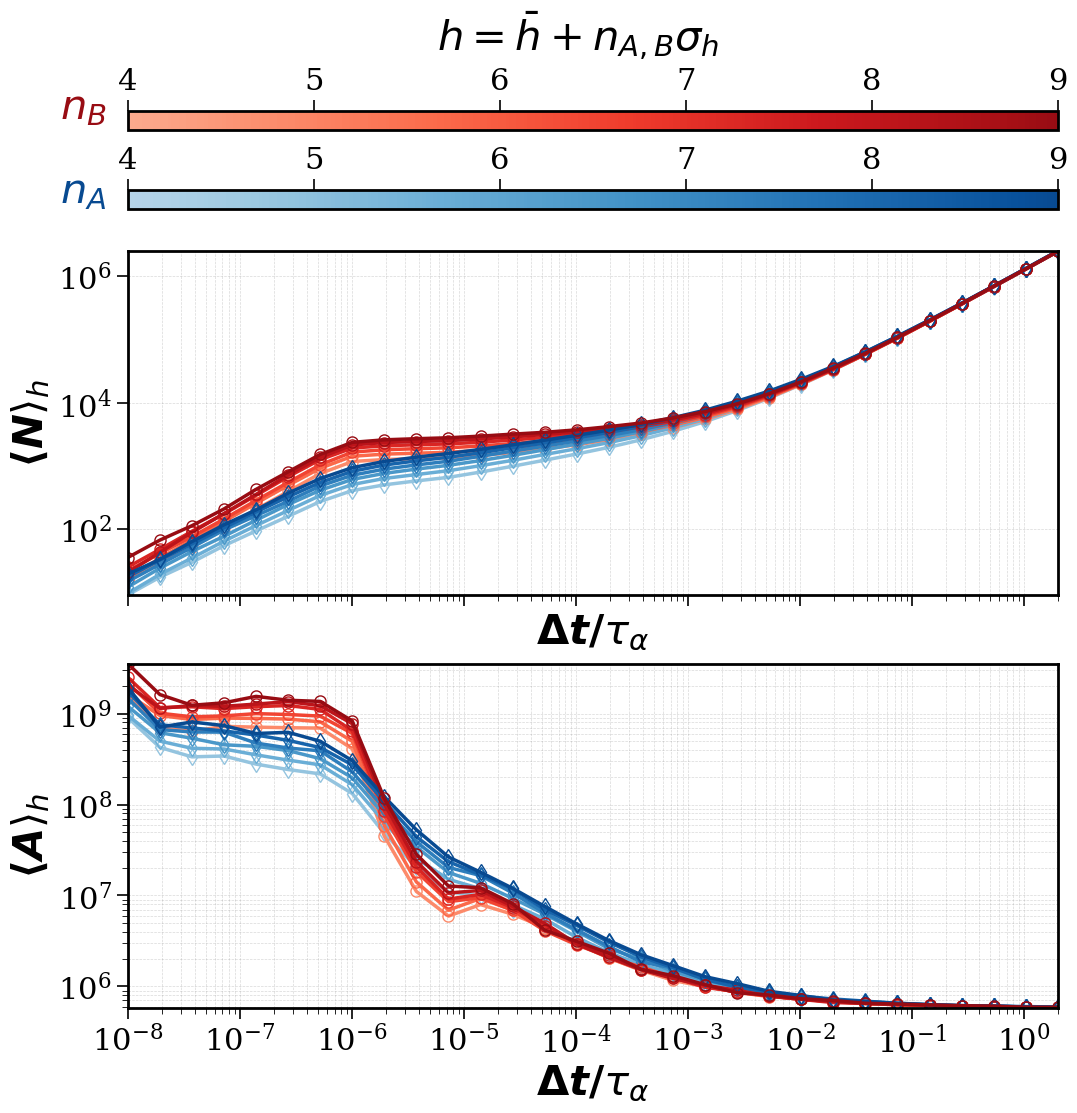

In [38]:
cmap_before = plt.get_cmap('Reds')
colors_before = cmap_before(np.linspace(0.4, 0.9, N_H))
cmap_after = plt.get_cmap('Blues')
colors_after = cmap_after(np.linspace(0.4, 0.9, N_H))

fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
    axs[0].plot(time_windows, mean_n_after[h], linestyle='-', markersize=8,
                marker=r'd', fillstyle='none', color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')
    axs[0].plot(time_windows, mean_n_before[h], linestyle='-', markersize=8, fillstyle='none',
                marker='o', color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')
    axs[1].plot(time_windows, mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none',
                color=colors_after[i], markersize=8)
    axs[1].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', fillstyle='none',
                color=colors_before[i],
                markersize=8)

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
axs[0].grid(True, alpha=0.3, which='both', ls='--')
axs[0].set_xlim(min(time_windows), max(time_windows))
axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
axs[1].grid(True, alpha=0.3, which='both', ls='--')
axs[1].set_xlim(min(time_windows), max(time_windows))
axs[1].set_ylim(
    min([mean_activity_before[h].min() for h in HEIGHTS] + [mean_activity_after[h].min() for h in HEIGHTS]),
    max([mean_activity_before[h].max() for h in HEIGHTS] + [mean_activity_after[h].max() for h in HEIGHTS]))

# Create horizontal colorbars
norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.3, 0.9, 256))), norm=norm_before)
sm_before.set_array([])
cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                           location='top')

norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.3, 0.9, 256))), norm=norm_after)
sm_after.set_array([])
cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                          location='top')

# Add text annotations
fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
         color='black')

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'activity_vs_time.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'activity_vs_time.pkl'), 'wb') as f:
        pickle.dump(fig, f)

plt.show()

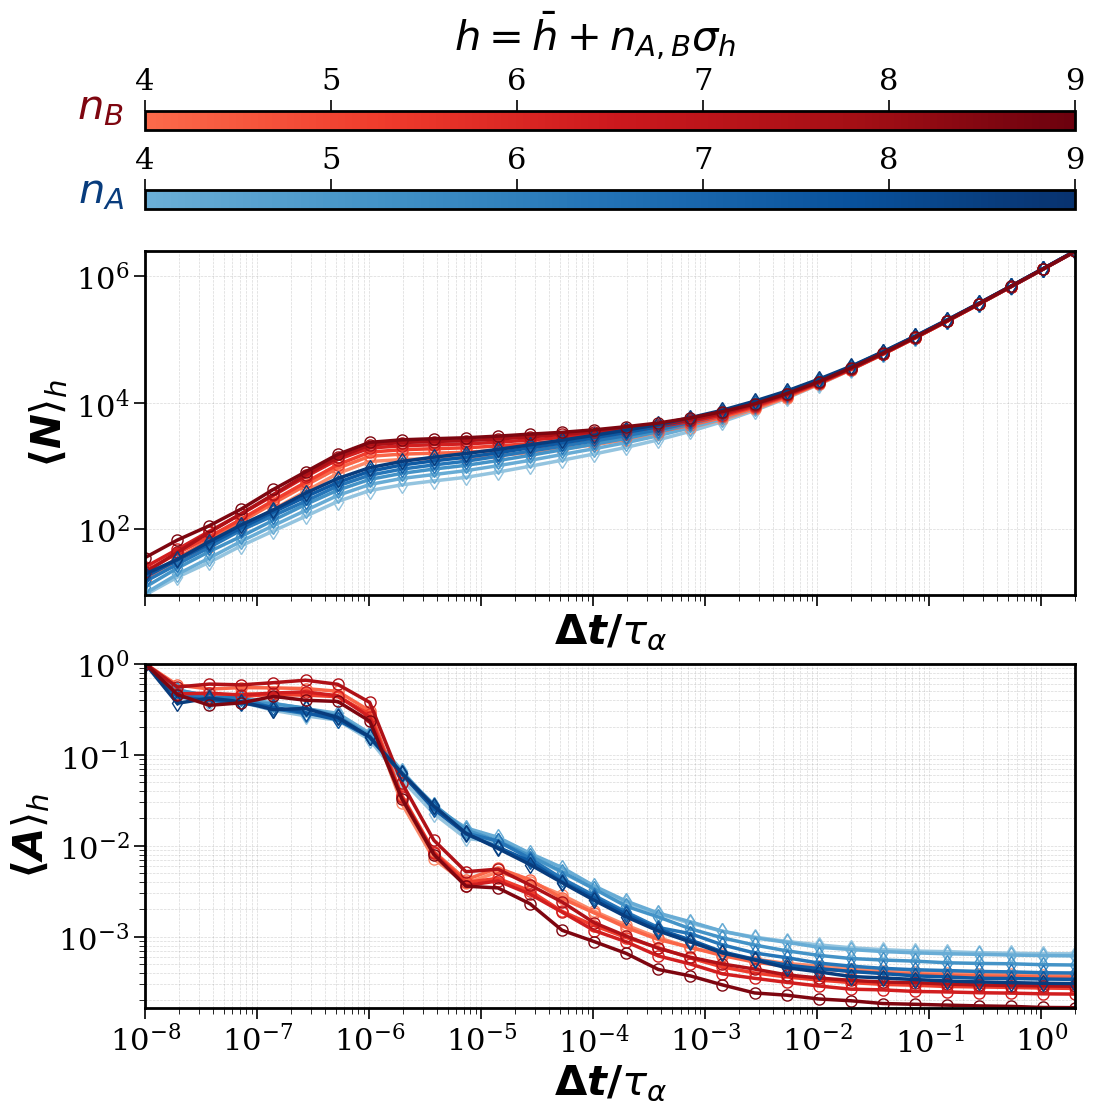

In [34]:
cmap_before = plt.get_cmap('Reds')
colors_before = cmap_before(np.linspace(0.4, 0.95, N_H))
cmap_after = plt.get_cmap('Blues')
colors_after = cmap_after(np.linspace(0.4, 0.95, N_H))

fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
    axs[0].plot(time_windows, mean_n_after[h], linestyle='-',
                markersize=8, marker=r'd', fillstyle='none',
                color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')

    axs[0].plot(time_windows, mean_n_before[h], linestyle='-',
                markersize=8, fillstyle='none', marker='o',
                color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')

    axs[1].plot(time_windows, normalized_mean_activity_after[h], linestyle='-',
                marker=r'd', fillstyle='none', markersize=8,
                color=colors_after[i])
    axs[1].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', fillstyle='none',
                color=colors_before[i],
                markersize=8)

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
axs[0].grid(True, alpha=0.3, which='both', ls='--')
axs[0].set_xlim(min(time_windows), max(time_windows))
axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
axs[1].grid(True, alpha=0.3, which='both', ls='--')
axs[1].set_xlim(min(time_windows), max(time_windows))
axs[1].set_ylim(
    min([normalized_mean_activity_before[h].min() for h in HEIGHTS] + [normalized_mean_activity_after[h].min() for h
                                                                       in HEIGHTS]),
    max([normalized_mean_activity_before[h].max() for h in HEIGHTS] + [normalized_mean_activity_after[h].max() for h
                                                                       in HEIGHTS]))

# Create horizontal colorbars
norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.5, 0.99, 256))), norm=norm_before)
sm_before.set_array([])
cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                           location='top')

norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.5, 0.99, 256))), norm=norm_after)
sm_after.set_array([])
cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                          location='top')

# Add text annotations
fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
         color='black')

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'norm_activity_vs_time.pkl'), 'wb') as f:
        pickle.dump(fig, f)
plt.show()

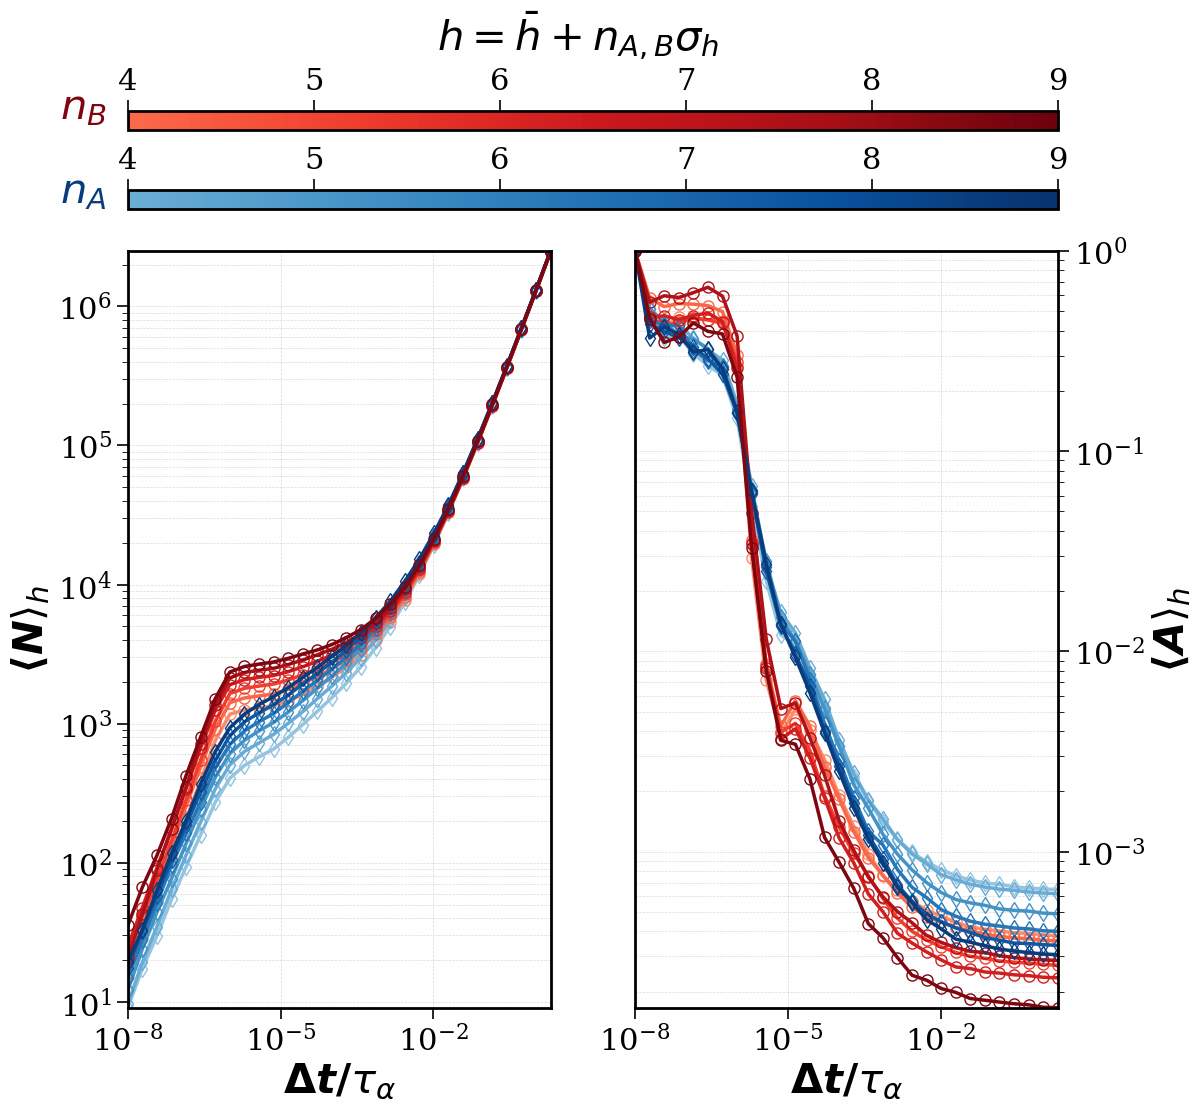

In [39]:
cmap_before = plt.get_cmap('Reds')
colors_before = cmap_before(np.linspace(0.4, 0.95, N_H))
cmap_after = plt.get_cmap('Blues')
colors_after = cmap_after(np.linspace(0.4, 0.95, N_H))

fig, axs = plt.subplots(1, 2, figsize=(12, 12), sharex=True)
for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
    axs[0].plot(time_windows, mean_n_after[h], linestyle='-',
                markersize=8, marker=r'd', fillstyle='none',
                color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')

    axs[0].plot(time_windows, mean_n_before[h], linestyle='-',
                markersize=8, fillstyle='none', marker='o',
                color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')

    axs[1].plot(time_windows, normalized_mean_activity_after[h], linestyle='-',
                marker=r'd', fillstyle='none', markersize=8,
                color=colors_after[i])
    axs[1].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', fillstyle='none',
                color=colors_before[i],
                markersize=8)

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
axs[0].grid(True, alpha=0.3, which='both', ls='--')
axs[0].set_xlim(min(time_windows), max(time_windows))
axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
axs[1].grid(True, alpha=0.3, which='both', ls='--')
axs[1].set_xlim(min(time_windows), max(time_windows))
axs[1].set_ylim(
    min([normalized_mean_activity_before[h].min() for h in HEIGHTS] + [normalized_mean_activity_after[h].min() for h
                                                                       in HEIGHTS]),
    max([normalized_mean_activity_before[h].max() for h in HEIGHTS] + [normalized_mean_activity_after[h].max() for h
                                                                       in HEIGHTS]))
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

# Create horizontal colorbars
norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.5, 0.99, 256))), norm=norm_before)
sm_before.set_array([])
cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                           location='top')

norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.5, 0.99, 256))), norm=norm_after)
sm_after.set_array([])
cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                          location='top')

# Add text annotations
fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
         color='black')

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time2.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'norm_activity_vs_time2.pkl'), 'wb') as f:
        pickle.dump(fig, f)

plt.show()

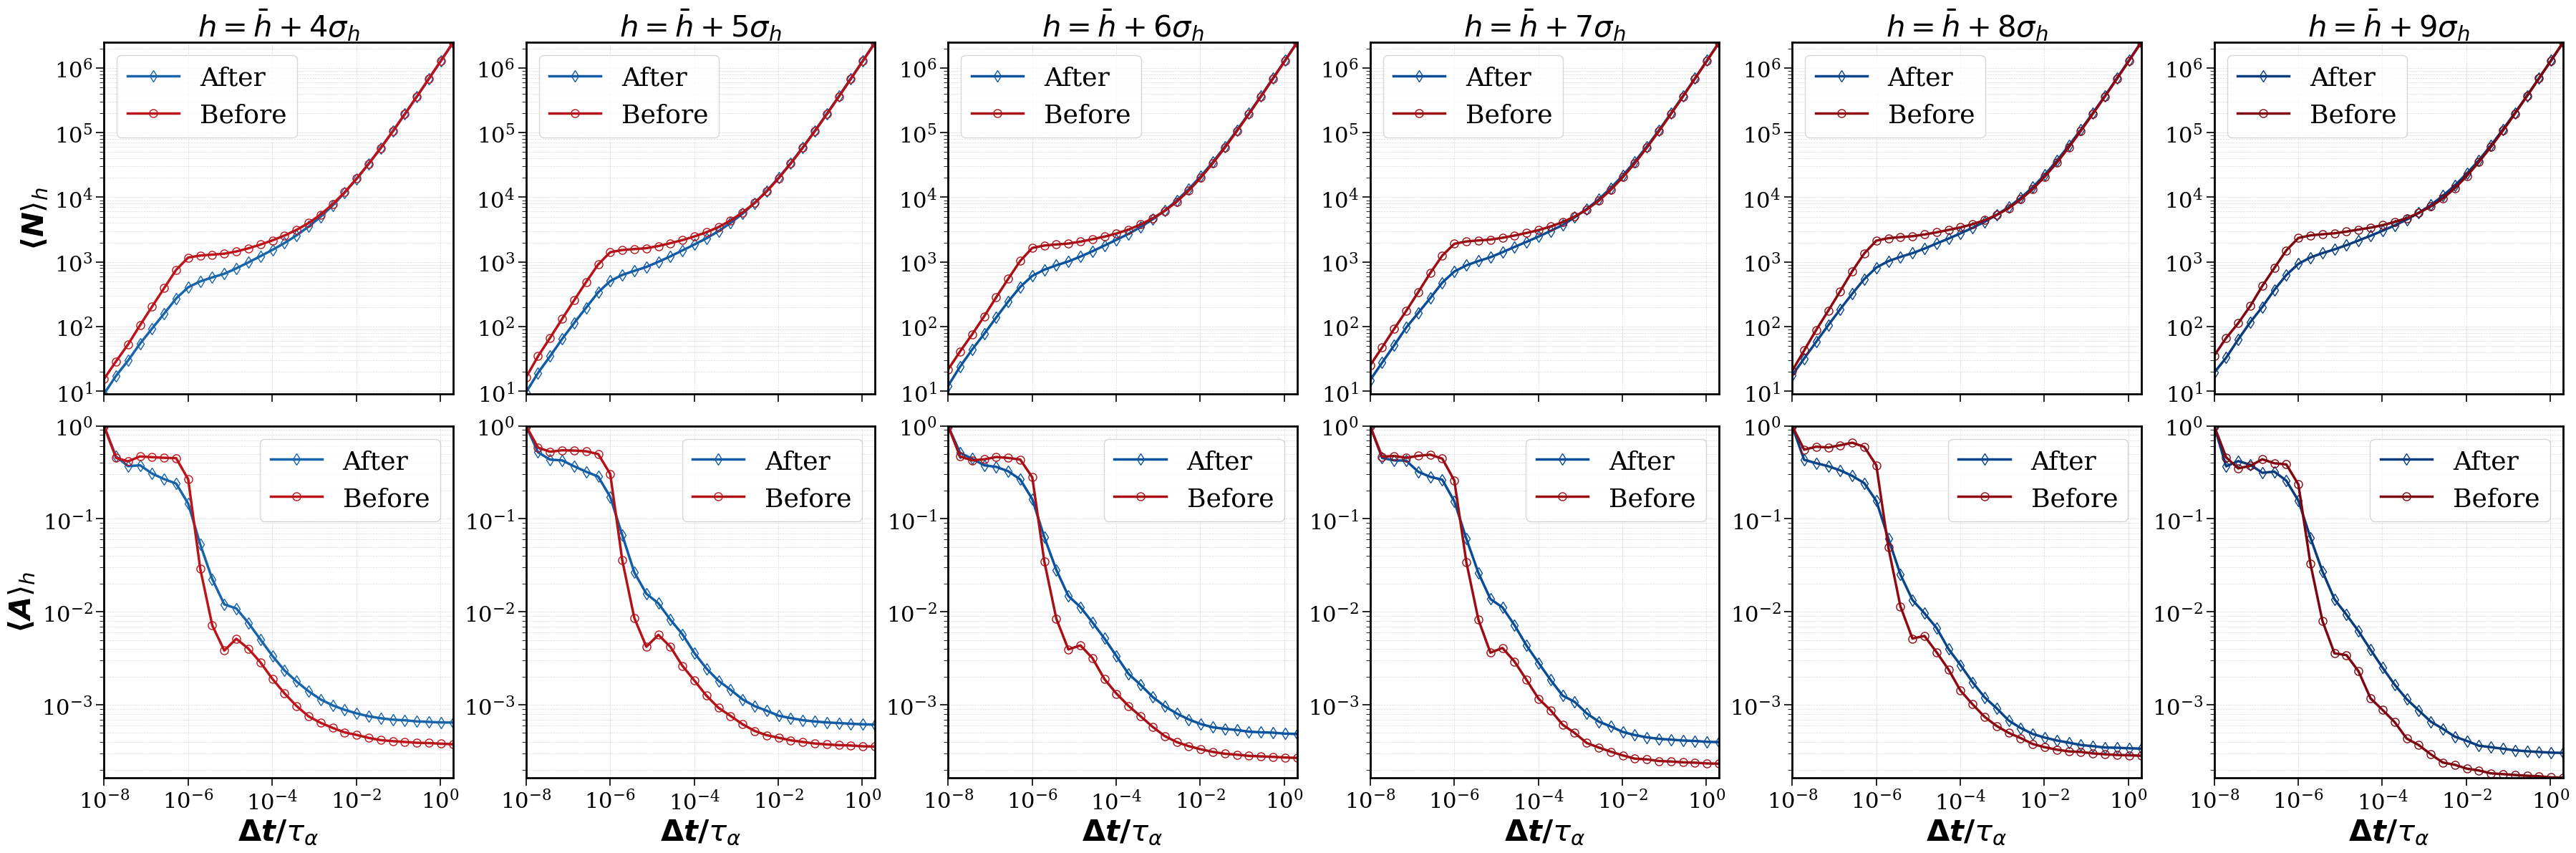

In [40]:
cmap_before = plt.get_cmap('Reds')
colors_before = cmap_before(np.linspace(0.8, 0.95, N_H))
cmap_after = plt.get_cmap('Blues')
colors_after = cmap_after(np.linspace(0.8, 0.95, N_H))

fig, axs = plt.subplots(2, N_H, figsize=(6 * N_H, 12), sharex=True)
for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
    axs[0, i].plot(time_windows, mean_n_after[h], linestyle='-', markersize=8, fillstyle='none',
                   marker=r'd', color=colors_after[i], label='After')
    axs[0, i].plot(time_windows, mean_n_before[h], linestyle='-', markersize=8, fillstyle='none',
                   marker='o', color=colors_before[i], label='Before')
    axs[1, i].plot(time_windows, normalized_mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none',
                   color=colors_after[i], markersize=8, label='After')
    axs[1, i].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', color=colors_before[i],
                   markersize=8, fillstyle='none', label='Before')

    axs[0, i].set_xscale('log')
    axs[0, i].set_yscale('log')
    axs[0, i].set_title(rf'$h=\bar h+{n_std:.0f}\sigma_h$')
    axs[0, i].grid(True, alpha=0.3, which='both', ls='--')
    axs[0, i].legend(loc='upper left')
    axs[0, i].set_xlim(min(time_windows), max(time_windows))
    axs[0, i].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                       max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1, i].set_xscale('log')
    axs[1, i].set_yscale('log')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1, i].grid(True, alpha=0.3, which='both', ls='--')
    axs[1, i].set_xlim(min(time_windows), max(time_windows))
    axs[1, i].set_ylim(min([normalized_mean_activity_before[h].min() for h in HEIGHTS]
                           + [normalized_mean_activity_after[h].min() for h in HEIGHTS]),
                       max([normalized_mean_activity_before[h].max() for h in HEIGHTS]
                           + [normalized_mean_activity_after[h].max() for h in HEIGHTS]))

axs[0, 0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
axs[1, 0].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')

plt.tight_layout()

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time_all.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'norm_activity_vs_time_all.pkl'), 'wb') as f:
        pickle.dump(fig, f)

plt.show()